In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import nltk
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [ ]:
data = pd.read_csv('Semua.csv')
data

,full_text
0,@henrdeyjo Sukses Pemilu Damai adalah hasil da...
1,@marsieles_monly Menerima hasil Pemilu Damai a...
2,"@marsieles_monly Dalam keberagaman politik, ma..."
3,@henrdeyjo Mari kita sambut hasil pemilu denga...
4,@HisyamMochtar Demi kelangasungan hidup Berban...
...,...
1495,Bodolah siapapun presidennya semoga amanah dan...
1496,Hasil pilpres dah fix ya? Hmm ya yaudah lah yg...
1497,Saya memohon kepada Allah SWT dengan perantara...
1498,@tvOneNews Lihatlah ini @jokowi ... Rakyat men...


**CASE FOLDING**

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

data['case_folding'] = data['full_text'].apply(case_folding)
data

,full_text,case_folding
0,@henrdeyjo Sukses Pemilu Damai adalah hasil da...,@henrdeyjo sukses pemilu damai adalah hasil da...
1,@marsieles_monly Menerima hasil Pemilu Damai a...,@marsieles_monly menerima hasil pemilu damai a...
2,"@marsieles_monly Dalam keberagaman politik, ma...","@marsieles_monly dalam keberagaman politik, ma..."
3,@henrdeyjo Mari kita sambut hasil pemilu denga...,@henrdeyjo mari kita sambut hasil pemilu denga...
4,@HisyamMochtar Demi kelangasungan hidup Berban...,@hisyammochtar demi kelangasungan hidup berban...
...,...,...
1495,Bodolah siapapun presidennya semoga amanah dan...,bodolah siapapun presidennya semoga amanah dan...
1496,Hasil pilpres dah fix ya? Hmm ya yaudah lah yg...,hasil pilpres dah fix ya? hmm ya yaudah lah yg...
1497,Saya memohon kepada Allah SWT dengan perantara...,saya memohon kepada allah swt dengan perantara...
1498,@tvOneNews Lihatlah ini @jokowi ... Rakyat men...,@tvonenews lihatlah ini @jokowi ... rakyat men...


In [ ]:
del(data['full_text'])
data

,case_folding
0,@henrdeyjo sukses pemilu damai adalah hasil da...
1,@marsieles_monly menerima hasil pemilu damai a...
2,"@marsieles_monly dalam keberagaman politik, ma..."
3,@henrdeyjo mari kita sambut hasil pemilu denga...
4,@hisyammochtar demi kelangasungan hidup berban...
...,...
1495,bodolah siapapun presidennya semoga amanah dan...
1496,hasil pilpres dah fix ya? hmm ya yaudah lah yg...
1497,saya memohon kepada allah swt dengan perantara...
1498,@tvonenews lihatlah ini @jokowi ... rakyat men...


**CLEANING**

In [ ]:
def remove_URL(tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet):
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                              "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_mentions(tweet):
  tweet = re.sub(r'@[a-zA-Z0-9_]+','', tweet)
  return tweet

def remove_hashtag(tweet):
  tweet = re.sub(r'#\w+','', tweet)
  return tweet

def remove_symbols(tweet):
  tweet = re.sub(r'[^a-zA-Z0-9\s]','', tweet) # Menghapus semua simbol
  return tweet

def remove_numbers(tweet):
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

data['cleaning'] = data['case_folding'].apply(lambda x: remove_URL(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_html(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_emoji(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_mentions(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_hashtag(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_symbols(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_numbers(x))

data

,case_folding,cleaning
0,@henrdeyjo sukses pemilu damai adalah hasil da...,sukses pemilu damai adalah hasil dari kerja k...
1,@marsieles_monly menerima hasil pemilu damai a...,menerima hasil pemilu damai adalah bukti nyat...
2,"@marsieles_monly dalam keberagaman politik, ma...",dalam keberagaman politik mari bersatu dengan...
3,@henrdeyjo mari kita sambut hasil pemilu denga...,mari kita sambut hasil pemilu dengan sikap de...
4,@hisyammochtar demi kelangasungan hidup berban...,demi kelangasungan hidup berbangsa dan berneg...
...,...,...
1495,bodolah siapapun presidennya semoga amanah dan...,bodolah siapapun presidennya semoga amanah dan...
1496,hasil pilpres dah fix ya? hmm ya yaudah lah yg...,hasil pilpres dah fix ya hmm ya yaudah lah yg ...
1497,saya memohon kepada allah swt dengan perantara...,saya memohon kepada allah swt dengan perantara...
1498,@tvonenews lihatlah ini @jokowi ... rakyat men...,lihatlah ini rakyat menolak hasil pilpres


In [ ]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words (text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash (word))
            else:
                replaced_words.append(word)
                replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text

In [ ]:
# Baca kamus data tidak baku
kamus_data = pd.read_csv('normalisasi.csv')
kamus_tidak_baku = dict(zip(kamus_data['kata_tidak_baku'],kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['cleaning']=data['cleaning'].apply(lambda x:replace_taboo_words(x, kamus_tidak_baku))
data

,case_folding,cleaning
0,@henrdeyjo sukses pemilu damai adalah hasil da...,sukses pemilu damai adalah hasil dari kerja ke...
1,@marsieles_monly menerima hasil pemilu damai a...,menerima hasil pemilu damai adalah bukti nyata...
2,"@marsieles_monly dalam keberagaman politik, ma...",dalam keberagaman politik mari bersatu dengan ...
3,@henrdeyjo mari kita sambut hasil pemilu denga...,mari kita sambut hasil pemilu dengan sikap dew...
4,@hisyammochtar demi kelangasungan hidup berban...,demi kelangasungan hidup berbangsa dan bernega...
...,...,...
1495,bodolah siapapun presidennya semoga amanah dan...,bodolah siapapun presidennya semoga amanah dan...
1496,hasil pilpres dah fix ya? hmm ya yaudah lah yg...,hasil pilpres sudah fix ya hmm ya yaudah lah y...
1497,saya memohon kepada allah swt dengan perantara...,saya memohon kepada allah swt dengan perantara...
1498,@tvonenews lihatlah ini @jokowi ... rakyat men...,lihatlah ini rakyat menolak hasil pilpres


In [ ]:
del(data['case_folding'])
data

,cleaning
0,sukses pemilu damai adalah hasil dari kerja ke...
1,menerima hasil pemilu damai adalah bukti nyata...
2,dalam keberagaman politik mari bersatu dengan ...
3,mari kita sambut hasil pemilu dengan sikap dew...
4,demi kelangasungan hidup berbangsa dan bernega...
...,...
1495,bodolah siapapun presidennya semoga amanah dan...
1496,hasil pilpres sudah fix ya hmm ya yaudah lah y...
1497,saya memohon kepada allah swt dengan perantara...
1498,lihatlah ini rakyat menolak hasil pilpres


In [ ]:
data.to_csv('Hasil_normalisasi_NN.csv',encoding='utf8', index = False)

In [ ]:
data = pd.read_csv('Hasil_normalisasi_NN_1500Data.csv')
data

,cleaning,sentimen
0,sukses pemilu damai adalah hasil dari kerja ke...,positif
1,menerima hasil pemilu damai adalah bukti nyata...,positif
2,dalam keberagaman politik mari bersatu dengan ...,positif
3,mari kita sambut hasil pemilu dengan sikap dew...,positif
4,demi kelangasungan hidup berbangsa dan bernega...,negatif
...,...,...
1495,bodolah siapapun presidennya semoga amanah dan...,positif
1496,hasil pilpres sudah fix ya hmm ya yaudah lah y...,positif
1497,saya memohon kepada allah swt dengan perantara...,negatif
1498,lihatlah ini rakyat menolak hasil pilpres,negatif


**WORDCLOUD**

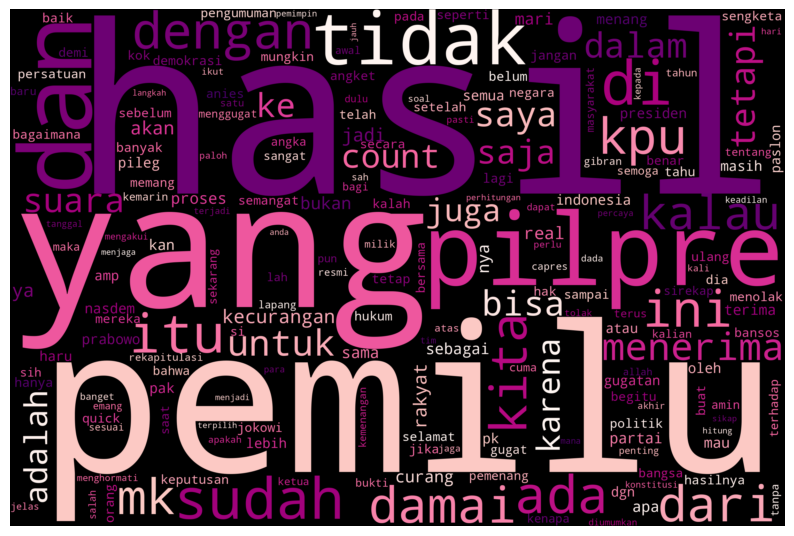

In [ ]:
def plot_cloud (wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['cleaning']])

wordcloud = WordCloud (
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='RdPu',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)
plot_cloud (wordcloud)

In [ ]:
!pip install pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


In [ ]:
import pandas as pd
import numpy as np

from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras import backend as K
import gc

import matplotlib.pyplot as plt
import seaborn as sns

**Tokenizing**

In [ ]:
text = data['cleaning'].tolist()
y = data['sentimen']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(text)

vocab = len(word_tokenizer.index_word) + 1

encode_text = word_tokenizer.texts_to_sequences(text)

max_length = 100
X = pad_sequences(encode_text, maxlen=max_length, padding='post')
print(X)

[[ 588    2   27 ...    0    0    0]
 [  18    1    2 ...    0    0    0]
 [  29  367   86 ...    0    0    0]
 ...
 [  19 5259  176 ...    0    0    0]
 [5267   11   35 ...    0    0    0]
 [  19 5268  223 ...    0    0    0]]


**PEMODELAN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = Sequential()
embedding_layer = Embedding(input_dim=vocab, output_dim=64 , input_length=max_length)
model.add (embedding_layer)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#BatchNormalization(momentum=0.80)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
def reset_keras():
    K.clear_session()
    gc.collect()

reset_keras()

In [ ]:
print(type(model.loss))
print(type(model.metrics))
model_history=model.fit(X_train, y_train, epochs=40,batch_size=64,validation_data=(X_test,y_test), verbose=2)

<class 'str'>
<class 'list'>
Epoch 1/40
19/19 - 2s - 123ms/step - accuracy: 0.3650 - loss: 1.0919 - val_accuracy: 0.4300 - val_loss: 1.0676
Epoch 2/40
19/19 - 0s - 22ms/step - accuracy: 0.4292 - loss: 1.0593 - val_accuracy: 0.4300 - val_loss: 1.0453
Epoch 3/40
19/19 - 1s - 32ms/step - accuracy: 0.4317 - loss: 1.0341 - val_accuracy: 0.4300 - val_loss: 1.0265
Epoch 4/40
19/19 - 1s - 32ms/step - accuracy: 0.4325 - loss: 0.9849 - val_accuracy: 0.4433 - val_loss: 0.9940
Epoch 5/40
19/19 - 0s - 21ms/step - accuracy: 0.5417 - loss: 0.8738 - val_accuracy: 0.5367 - val_loss: 0.9405
Epoch 6/40
19/19 - 1s - 33ms/step - accuracy: 0.7300 - loss: 0.6900 - val_accuracy: 0.6400 - val_loss: 0.8520
Epoch 7/40
19/19 - 1s - 37ms/step - accuracy: 0.8600 - loss: 0.4553 - val_accuracy: 0.6800 - val_loss: 0.8292
Epoch 8/40
19/19 - 1s - 40ms/step - accuracy: 0.9292 - loss: 0.2555 - val_accuracy: 0.6933 - val_loss: 0.8354
Epoch 9/40
19/19 - 1s - 67ms/step - accuracy: 0.9542 - loss: 0.1592 - val_accuracy: 0.6667

In [ ]:
# Membuat prediksi pada set pengujian
#score = model.evaluate(X_train, y_train, verbose=1)
#print("Train Loss:", score[0])
#print("Train Accuracy:", score[1])

score2 = model.evaluate(X_test, y_test, batch_size=1)
#print("Test Loss:", score2[0])
print("Test Accuracy:", score2[1])
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

best_epoch = np.argmax(model_history.history['val_accuracy']) + 1
best_accuracy = max(model_history.history['val_accuracy'])

print(f'Epoch dengan akurasi tertinggi: {best_epoch}')
print(f'Akurasi tertinggi pada data validasi: {best_accuracy:.4f}')

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7201 - loss: 2.1300
Test Accuracy: 0.7066666483879089
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch dengan akurasi tertinggi: 20
Akurasi tertinggi pada data validasi: 0.7067


In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

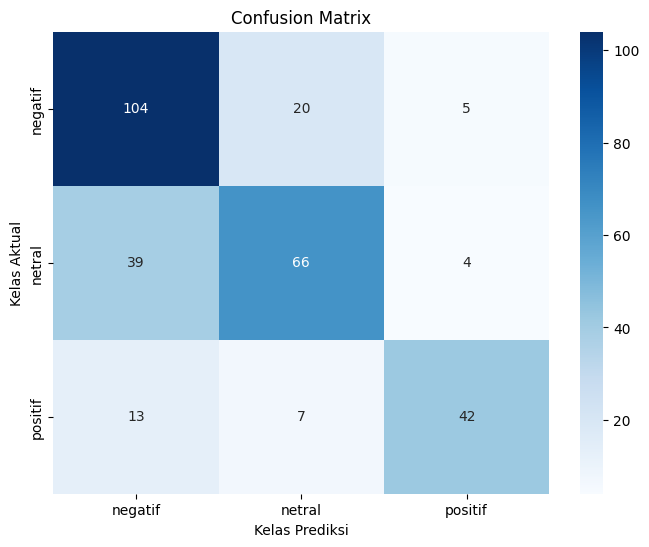

In [ ]:
# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Menampilkan laporan klasifikasi
print(classification_report(y_test_classes, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.67      0.81      0.73       129
     Neutral       0.71      0.61      0.65       109
    Positive       0.82      0.68      0.74        62

    accuracy                           0.71       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.71      0.71      0.70       300



In [ ]:
# Teks baru yang ingin diuji
new_texts = ["Pemilu sangat bagus"]

# Preprocess teks baru
new_encode_text = word_tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_encode_text, maxlen=max_length, padding='post')

# Prediksi dengan model
new_predictions = model.predict(new_X)

# Mengambil label dengan probabilitas tertinggi
predicted_label = np.argmax(new_predictions, axis=1)

# Konversi label prediksi kembali ke label asli
predicted_sentiment = label_encoder.inverse_transform(predicted_label)
print(f"Prediksi Sentimen: {predicted_sentiment[0]}")